In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

url ='https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv'

In [70]:
comp_df = pd.DataFrame(pd.read_csv(url))

In [71]:
print(comp_df.head(20))

    Company   Age  Salary       Place Country  Gender
0       TCS  20.0     NaN     Chennai   India       0
1   Infosys  30.0     NaN      Mumbai   India       0
2       TCS  35.0  2300.0    Calcutta   India       0
3   Infosys  40.0  3000.0       Delhi   India       0
4       TCS  23.0  4000.0      Mumbai   India       0
5   Infosys   NaN  5000.0    Calcutta   India       0
6       TCS   NaN  6000.0     Chennai   India       1
7   Infosys  23.0  7000.0      Mumbai   India       1
8       TCS  34.0  8000.0    Calcutta   India       1
9       CTS  45.0  9000.0       Delhi   India       0
10      CTS  23.0     NaN      Mumbai   India       0
11      CTS  34.0  1089.0    Calcutta   India       0
12      CTS  45.0     NaN     Chennai   India       0
13      CTS  18.0  1234.0      Mumbai   India       0
14  Infosys  40.0  3000.0    Calcutta   India       0
15      TCS  23.0  3000.0       Delhi   India       0
16  Infosys  23.0  3030.0  Podicherry   India       0
17      TCS  34.0  5000.0   

In [28]:
#print(comp_df.info())

In [72]:
comp_df = comp_df.dropna(subset = ['Company'])

In [73]:
comp_df.loc[comp_df['Company']=='Congnizant','Company']='CTS'

In [74]:
comp_df.loc[comp_df['Company']=='Infosys Pvt Lmt','Company']='Infosys'

In [75]:
comp_df.loc[comp_df['Company']=='Tata Consultancy Services','Company']='TCS'

In [79]:
df_cts = comp_df[comp_df.Company=='CTS']
df_cts['Salary'] = df_cts['Salary'].fillna(df_cts['Salary'].mean()).round(2)
df_cts['Age'] = df_cts['Age'].fillna(df_cts['Age'].mean())
df_tcs =comp_df[comp_df.Company=='TCS']
df_tcs['Salary']= df_tcs['Salary'].fillna(df_tcs['Salary'].mean()).round(2)
df_tcs['Age'] = df_tcs['Age'].fillna(df_tcs['Age'].mean())
df_infy = comp_df[comp_df['Company']=='Infosys']
df_infy['Salary'] = df_infy['Salary'].fillna(df_infy['Salary'].mean()).round(2)
df_infy['Age'] = df_infy['Age'].fillna(df_infy['Age'].mean())

c:\users\ankit kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ankit kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ankit kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

In [91]:
comp_df = pd.concat([df_cts,df_infy,df_tcs]).reset_index()
comp_df.sort_values('index',inplace=True)
comp_df.set_index('index',inplace=True)

In [ ]:
min_in = np.mean(comp_df['Age'])
comp_df['Age'] = np.where(comp_df['Age'] == 0, min_in,comp_df['Age'])

In [202]:
comp_df['Age'] = comp_df['Age'].astype(int)

In [114]:
comp_df['Place'] = comp_df['Place'].fillna('Others')

In [106]:
def age_group(x):
    if x < 20:
        return '< 20'
    elif (x >= 20) & (x <= 30):
        return '20-30'
    elif (x >= 31) & (x <= 40):
        return '31-40'
    else:
        return '> 40'
        

In [107]:
def gender_group(x):
    if x == 0:
        return 'Female'
    else:
        return 'Male'

In [108]:
def salary_group(x):
    if (x < 3000):
        return '< 3000'
    elif (x >= 3000) & (x <= 6000):
        return '3000-6000'
    elif (x >= 6001) & (x <= 9000):
        return '6001-9000'
    else:
        return 'x > 9000'
            

In [109]:
comp_df['Age_G'] = comp_df['Age'].apply(age_group)

In [110]:
comp_df['Gender_G'] = comp_df['Gender'].apply(gender_group)

In [111]:
comp_df['Salary_G'] = comp_df['Salary'].apply(salary_group)

In [115]:
print(comp_df.head())

       Company   Age   Salary     Place Country  Gender Age_Group Age Group  \
index                                                                         
0          TCS  20.0  5609.71   Chennai   India       0     20-30     20-30   
1      Infosys  30.0  5331.35    Mumbai   India       0     20-30     20-30   
2          TCS  35.0  2300.00  Calcutta   India       0  31 to 40  31 to 40   
3      Infosys  40.0  3000.00     Delhi   India       0  31 to 40  31 to 40   
4          TCS  23.0  4000.00    Mumbai   India       0     20-30     20-30   

       Age_G Gender_G   Salary_G  
index                             
0      20-30   Female  3000-6000  
1      20-30   Female  3000-6000  
2      31-40   Female     < 3000  
3      31-40   Female  3000-6000  
4      20-30   Female  3000-6000  


In [116]:
print(comp_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 147
Data columns (total 11 columns):
Company      140 non-null object
Age          140 non-null float64
Salary       140 non-null float64
Place        140 non-null object
Country      140 non-null object
Gender       140 non-null int64
Age_Group    140 non-null object
Age Group    140 non-null object
Age_G        140 non-null object
Gender_G     140 non-null object
Salary_G     140 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 18.1+ KB
None


In [47]:
#print(comp_df.Company.unique())

In [139]:
emp_count = comp_df.Company.value_counts().reset_index()

In [142]:
emp_count.columns=(['Company','Count'])
#print(emp_count)

Text(0.5, 1.0, 'Count Of Emp in Each Company')

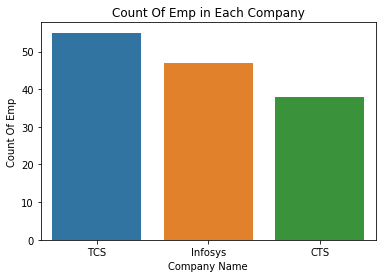

In [141]:
sns.barplot(x=emp_count['Company'],y=emp_count['Count'])
plt.ylabel('Count Of Emp')
plt.xlabel('Company Name')
plt.title('Count Of Emp in Each Company')

In [161]:
comp_df['Count'] =1

In [164]:
cempcnt = comp_df.groupby(['Place']).count()['Count'].reset_index()

Text(0.5, 1.0, 'Emp working in each city')

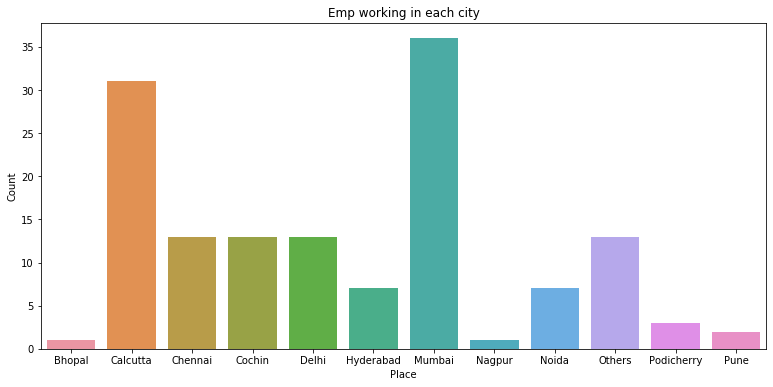

In [163]:
plt.figure(figsize = (13,6))
sns.barplot(x=cempcnt['Place'],y=cempcnt['Count'])
plt.title('Emp working in each city')

## Average Salary of Employee working in different Organization

In [172]:
temp1 = comp_df.groupby(['Company']).mean().reset_index()
print(temp1[['Company','Salary']].round(2))


   Company   Salary
0      CTS  4582.93
1  Infosys  5331.35
2      TCS  5609.71


## Count of Male and Female Employee working in each organization

In [199]:
temp2 = comp_df.groupby(['Gender_G','Company']).count()['Count'].reset_index()

In [200]:
temp2.pivot_table(values='Count',index=['Gender_G','Company'])

Count
Gender_G Company       
Female   CTS         30
         Infosys     40
         TCS         38
Male     CTS          8
         Infosys      7
         TCS         17

## Average Age and Salary bases on Gender

In [212]:
temp4 = comp_df.groupby('Gender_G').mean().reset_index()
temp4.pivot_table(index='Gender_G',values=['Age','Salary']).round(2)

,Age,Salary
Gender_G,,
Female,30.28,4396.37
Male,31.53,8076.59
